<a href="https://colab.research.google.com/github/DivjotBanga/DivjotBanga.github.io/blob/master/Bank_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All the install and imports

In [0]:
!pip install -U pip
!pip install researchpy
!pip install pandas==0.24.0
!pip install gcsfs
!pip install -U scikit-learn
!pip install imbalanced-learn

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.2.2)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [0]:
from google.colab import drive
import pandas as pd
import numpy as np 
from  scipy.stats import ttest_ind, levene ,shapiro,iqr
import  scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.io as sio
import math
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from statsmodels.stats.power import TTestIndPower
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm
import scipy.stats as stats
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Read the data

In [0]:
drive.mount('./data')

Drive already mounted at ./data; to attempt to forcibly remount, call drive.mount("./data", force_remount=True).


In [0]:
case_study_data = pd.read_csv('./data/My Drive/ML_training/Bank_Personal_Loan_Modelling.csv')

In [0]:
ID = case_study_data['ID']

In [0]:
case_study_data = case_study_data.drop('ID',axis = 1)

In [0]:
case_study_data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Data cleaning

In [0]:
case_study_data[case_study_data['Personal Loan']!=0].count()

Age                   480
Experience            480
Income                480
ZIP Code              480
Family                480
CCAvg                 480
Education             480
Mortgage              480
Personal Loan         480
Securities Account    480
CD Account            480
Online                480
CreditCard            480
dtype: int64

In [0]:
case_study_data.groupby(['Personal Loan']).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [0]:
(case_study_data['CreditCard'] == case_study_data['Personal Loan']).describe()

count     5000
unique       2
top       True
freq      3336
dtype: object

In [0]:
(case_study_data['Online'] == case_study_data['Personal Loan']).describe()

count      5000
unique        2
top       False
freq       2882
dtype: object

In [0]:
case_study_data[['Family','Personal Loan']].groupby('Personal Loan').describe()

Family                                             
                count      mean       std  min  25%  50%  75%  max
Personal Loan                                                     
0              4520.0  2.373451  1.148771  1.0  1.0  2.0  3.0  4.0
1               480.0  2.612500  1.115393  1.0  2.0  3.0  4.0  4.0

In [0]:
case_study_data[['Education','Personal Loan']].groupby('Personal Loan').describe()

Education                                             
                  count      mean       std  min  25%  50%  75%  max
Personal Loan                                                       
0                4520.0  1.843584  0.839975  1.0  1.0  2.0  3.0  3.0
1                 480.0  2.233333  0.753373  1.0  2.0  2.0  3.0  3.0

In [0]:
summary = case_study_data.groupby(['Personal Loan']).describe()

In [0]:
summary

Age                              ... CreditCard               
                count       mean        std   min  ...        25%  50%  75%  max
Personal Loan                                      ...                          
0              4520.0  45.367257  11.450427  23.0  ...        0.0  0.0  1.0  1.0
1               480.0  45.066667  11.590964  26.0  ...        0.0  0.0  1.0  1.0

[2 rows x 96 columns]

# Data Visualization

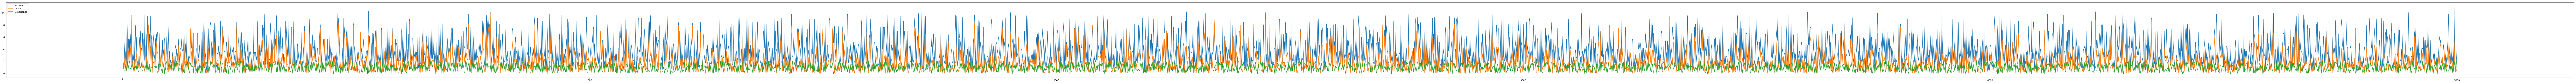

In [0]:
fig = plt.figure(num=None, figsize=(200, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ID, 0.05*case_study_data['Income'])
plt.plot(ID, case_study_data['CCAvg'])
plt.plot(ID, 0.05*case_study_data['Experience'])

plt.legend(loc='upper left')
plt.show()

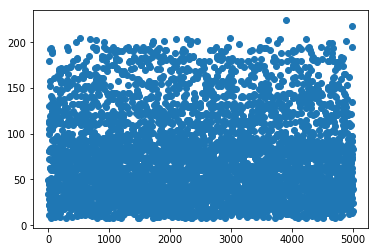

In [0]:
plt.scatter(ID,case_study_data['Income'])

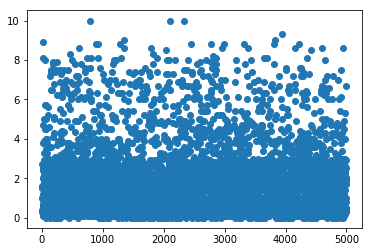

In [0]:
plt.scatter(ID,case_study_data['CCAvg'])

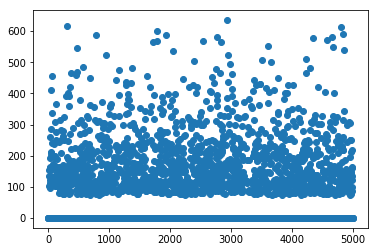

In [0]:
plt.scatter(ID,case_study_data['Mortgage'])

#Data Creation and column selection

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/250px-Boxplot_vs_PDF.svg.png">

In [0]:
 def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [0]:
col_name = ['Age', 'Experience', 'Income', 'CCAvg','Education', 'Mortgage']
with_outliers = case_study_data
print(col_name)
for i in col_name:
    print(i)
    print(case_study_data.count())
    case_study_data = remove_outlier(case_study_data,i)

['Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage']
Age
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64
Experience
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64
Income
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             

In [0]:
case_study_data.count()

Age                   4358
Experience            4358
Income                4358
ZIP Code              4358
Family                4358
CCAvg                 4358
Education             4358
Mortgage              4358
Personal Loan         4358
Securities Account    4358
CD Account            4358
Online                4358
CreditCard            4358
dtype: int64

In [0]:
case_study_data.groupby(['Personal Loan']).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.590909,20.326979,59.323558,93154.809873,2.439883,1.444775,1.903715,37.746823,0.103128,0.033724,0.595552,0.297410
1,44.774436,19.676692,132.785714,93159.977444,2.496241,2.991917,2.236842,29.240602,0.124060,0.251880,0.563910,0.285714


In [0]:
case_study_data_clean = case_study_data.drop(['Age','Family','Online'],axis = 1)

In [0]:
X = case_study_data.loc[:, case_study_data.columns != 'Personal Loan']
Y = case_study_data['Personal Loan'] 
X_o = with_outliers.loc[:, with_outliers.columns != 'Personal Loan']
Y_o = with_outliers['Personal Loan'] 


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_o_train, X_o_test, y_o_train, y_o_test = train_test_split(X_o, Y_o, test_size=0.30, random_state=42)

In [0]:
smote_sample = SMOTE(random_state=0)
adasyn_sample = ADASYN(random_state=0)
columns = X.columns

In [0]:
smote_sample_data_X,smote_sample_data_y=smote_sample.fit_sample(X_train, y_train)
adasyn_sample_data_X,adasyn_sample_data_y=adasyn_sample.fit_sample(X_train, y_train)
smote_sample_data_X_o,smote_sample_data_y_o=smote_sample.fit_sample(X_o_train, y_o_train)
adasyn_sample_data_X_o,adasyn_sample_data_y_o=adasyn_sample.fit_sample(X_o_train, y_o_train)

In [0]:
smote_sample_data_X = pd.DataFrame(data=smote_sample_data_X,columns=columns )
smote_sample_data_y= pd.DataFrame(data=smote_sample_data_y,columns=['Personal Loan'])
smote_sample_data_X_o = pd.DataFrame(data=smote_sample_data_X_o,columns=columns )
smote_sample_data_y_o= pd.DataFrame(data=smote_sample_data_y_o,columns=['Personal Loan'])

In [0]:
adasyn_sample_data_X = pd.DataFrame(data=adasyn_sample_data_X,columns=columns )
adasyn_sample_data_y= pd.DataFrame(data=adasyn_sample_data_y,columns=['Personal Loan'])
adasyn_sample_data_X_o = pd.DataFrame(data=adasyn_sample_data_X_o,columns=columns )
adasyn_sample_data_y_o= pd.DataFrame(data=adasyn_sample_data_y_o,columns=['Personal Loan'])

In [0]:
print("length of oversampled data is ",len(smote_sample_data_X))
print("Number of no loan",len(smote_sample_data_y[smote_sample_data_y['Personal Loan']==0]))
print("Number of loan in oversampled data",len(smote_sample_data_y[smote_sample_data_y['Personal Loan']==1]))
print("Proportion of no loan data in oversampled data is ",len(smote_sample_data_y[smote_sample_data_y['Personal Loan']==0])/len(smote_sample_data_X ))
print("Proportion of loan data in oversampled data is ",len(smote_sample_data_y[smote_sample_data_y['Personal Loan']==1])/len(smote_sample_data_X ))

length of oversampled data is  5708
Number of no loan 2854
Number of loan in oversampled data 2854
Proportion of no loan data in oversampled data is  0.5
Proportion of loan data in oversampled data is  0.5


In [0]:
print("length of oversampled data is ",len(smote_sample_data_X_o))
print("Number of no loan",len(smote_sample_data_y_o[smote_sample_data_y_o['Personal Loan']==0]))
print("Number of loan in oversampled data",len(smote_sample_data_y_o[smote_sample_data_y_o['Personal Loan']==1]))
print("Proportion of no loan data in oversampled data is ",len(smote_sample_data_y_o[smote_sample_data_y_o['Personal Loan']==0])/len(smote_sample_data_X_o ))
print("Proportion of loan data in oversampled data is ",len(smote_sample_data_y_o[smote_sample_data_y_o['Personal Loan']==1])/len(smote_sample_data_X_o ))

length of oversampled data is  6354
Number of no loan 3177
Number of loan in oversampled data 3177
Proportion of no loan data in oversampled data is  0.5
Proportion of loan data in oversampled data is  0.5


In [0]:
print("length of oversampled data is ",len(adasyn_sample_data_X))
print("Number of no loan",len(adasyn_sample_data_y[adasyn_sample_data_y['Personal Loan']==0]))
print("Number of loan in oversampled data",len(adasyn_sample_data_y[adasyn_sample_data_y['Personal Loan']==1]))
print("Proportion of no loan data in oversampled data is ",len(adasyn_sample_data_y[adasyn_sample_data_y['Personal Loan']==0])/len(adasyn_sample_data_X ))
print("Proportion of loan data in oversampled data is ",len(adasyn_sample_data_y[adasyn_sample_data_y['Personal Loan']==1])/len(adasyn_sample_data_X ))

length of oversampled data is  5696
Number of no loan 2854
Number of loan in oversampled data 2842
Proportion of no loan data in oversampled data is  0.5010533707865169
Proportion of loan data in oversampled data is  0.49894662921348315


In [0]:
print("length of oversampled data is ",len(adasyn_sample_data_X_o))
print("Number of no loan",len(adasyn_sample_data_y_o[adasyn_sample_data_y_o['Personal Loan']==0]))
print("Number of loan in oversampled data",len(adasyn_sample_data_y_o[adasyn_sample_data_y_o['Personal Loan']==1]))
print("Proportion of no loan data in oversampled data is ",len(adasyn_sample_data_y_o[adasyn_sample_data_y_o['Personal Loan']==0])/len(adasyn_sample_data_X_o ))
print("Proportion of loan data in oversampled data is ",len(adasyn_sample_data_y_o[adasyn_sample_data_y_o['Personal Loan']==1])/len(adasyn_sample_data_X_o ))

length of oversampled data is  6276
Number of no loan 3177
Number of loan in oversampled data 3099
Proportion of no loan data in oversampled data is  0.5062141491395793
Proportion of loan data in oversampled data is  0.49378585086042065


In [0]:
y=['Personal Loan']
x=columns.tolist()

In [0]:
logreg = LogisticRegression()
rfe_S = RFE(logreg, 11)
rfe_S = rfe_S.fit(smote_sample_data_X, smote_sample_data_y.values.ravel())
print(rfe_S.support_)
print(rfe_S.ranking_)

[ True  True  True False  True  True  True  True  True  True  True  True]
[1 1 1 2 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg = LogisticRegression()
rfe_S = RFE(logreg, 11)
rfe_S = rfe_S.fit(smote_sample_data_X_o, smote_sample_data_y_o.values.ravel())
print(rfe_S.support_)
print(rfe_S.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True False  True  True  True  True  True  True  True  True]
[1 1 1 2 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
x

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [0]:
logreg = LogisticRegression()
rfe = RFE(logreg, 11)
rfe = rfe.fit(adasyn_sample_data_X, adasyn_sample_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True False  True  True  True  True  True  True  True  True]
[1 1 1 2 1 1 1 1 1 1 1 1]


In [0]:
logreg = LogisticRegression()
rfe = RFE(logreg, 11)
rfe = rfe.fit(adasyn_sample_data_X_o, adasyn_sample_data_y_o.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True False  True  True  True  True  True  True  True  True]
[1 1 1 2 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg = LogisticRegression()
rfe = RFE(logreg, 6)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False False False False False  True  True False  True  True  True  True]
[2 3 5 7 4 1 1 6 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
new_columns = ['Age','Experience', 'Income', 'Family','CCAvg','Education','Mortgage','Securities Account','CD Account', 'Online','CreditCard']

In [0]:
ad_X=adasyn_sample_data_X[new_columns]
ad_y=adasyn_sample_data_y['Personal Loan']
logit_model=sm.Logit(ad_y,ad_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.179176
         Iterations 9
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.742    
Dependent Variable:  Personal Loan     AIC:               2063.1695
Date:                2019-08-23 03:32  BIC:               2136.2922
No. Observations:    5696              Log-Likelihood:    -1020.6  
Df Model:            10                LL-Null:           -3948.2  
Df Residuals:        5685              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.5272   0.0196 -26.8989 0.0000 -0.5657 -0.4888
Experience          0.5193   0.0215  24.2

In [0]:
ad_X_o=adasyn_sample_data_X_o[new_columns]
ad_y_o=adasyn_sample_data_y_o['Personal Loan']
logit_model=sm.Logit(ad_y_o,ad_X_o)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.237715
         Iterations 8
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.657    
Dependent Variable:  Personal Loan     AIC:               3005.7929
Date:                2019-08-23 03:32  BIC:               3079.9823
No. Observations:    6276              Log-Likelihood:    -1491.9  
Df Model:            10                LL-Null:           -4349.7  
Df Residuals:        6265              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.4444   0.0141 -31.4421 0.0000 -0.4721 -0.4167
Experience          0.4438   0.0158  28.1

# Train data and Parameter tunning

In [0]:
col_without_mort = ['Age','Experience', 'Income', 'Family','CCAvg','Education','Securities Account','CD Account', 'Online','CreditCard']
col_without_mort_inc = ['Age','Experience', 'Family','CCAvg','Education','Securities Account','CD Account', 'Online','CreditCard']
col_without_mort_inc_fam = ['Age','Experience','CCAvg','Education','Securities Account','CD Account', 'Online','CreditCard']
col_without_mort_inc_fam_on = ['Age','Experience','CCAvg','Education','Securities Account','CD Account', 'CreditCard']
logreg_ad = LogisticRegression()
logreg_ad.fit(ad_X,ad_y)
logreg_ad_o = LogisticRegression()
logreg_ad_o.fit(ad_X_o[col_without_mort],ad_y_o)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_ad = logreg_ad.predict(X_test[new_columns])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_ad.score(X_test[new_columns], y_test)))
y_pred_ad_o = logreg_ad_o.predict(X_o_test[col_without_mort])
print('Accuracy of logistic regression classifier on test set with outliers: {:.2f}'.format(logreg_ad_o.score(X_o_test[col_without_mort], y_o_test)))

Accuracy of logistic regression classifier on test set: 0.91
Accuracy of logistic regression classifier on test set with outliers: 0.90


In [0]:
st_X=smote_sample_data_X[new_columns]
st_y=smote_sample_data_y['Personal Loan']
logit_model=sm.Logit(st_y,st_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.176553
         Iterations 9
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.745    
Dependent Variable:  Personal Loan     AIC:               2037.5281
Date:                2019-08-23 03:32  BIC:               2110.6739
No. Observations:    5708              Log-Likelihood:    -1007.8  
Df Model:            10                LL-Null:           -3956.5  
Df Residuals:        5697              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.5249   0.0194 -27.0002 0.0000 -0.5630 -0.4868
Experience          0.5182   0.0213  24.3

In [0]:
st_X_o=smote_sample_data_X_o[new_columns]
st_y_o=smote_sample_data_y_o['Personal Loan']
logit_model=sm.Logit(st_y_o,st_X_o)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.229179
         Iterations 8
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.669    
Dependent Variable:  Personal Loan     AIC:               2934.4038
Date:                2019-08-23 03:32  BIC:               3008.7290
No. Observations:    6354              Log-Likelihood:    -1456.2  
Df Model:            10                LL-Null:           -4404.3  
Df Residuals:        6343              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.4554   0.0146 -31.0948 0.0000 -0.4841 -0.4267
Experience          0.4577   0.0163  28.0

In [0]:
logreg_st = LogisticRegression()
logreg_st.fit(st_X,st_y)
logreg_st_o = LogisticRegression()
logreg_st_o.fit(st_X_o[col_without_mort],st_y_o)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_st = logreg_st.predict(X_test[new_columns])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_st.score(X_test[new_columns], y_test)))
y_pred_st_o = logreg_st_o.predict(X_o_test[col_without_mort])
print('Accuracy of logistic regression classifier on test set with outliers: {:.2f}'.format(logreg_st_o.score(X_o_test[col_without_mort], y_o_test)))

Accuracy of logistic regression classifier on test set: 0.91
Accuracy of logistic regression classifier on test set with outliers: 0.90


In [0]:
logreg_nm = LogisticRegression()
logreg_nm.fit(X_train,y_train)
y_pred_nm = logreg_nm.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_nm.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.94


In [0]:
logreg_nm = LogisticRegression()
logreg_nm.fit(X_train[col_without_mort],y_train)
y_pred_nm = logreg_nm.predict(X_test[col_without_mort])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_nm.score(X_test[col_without_mort], y_test)))

Accuracy of logistic regression classifier on test set: 0.96


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg_nm = LogisticRegression()
logreg_nm.fit(X_train[col_without_mort_inc],y_train)
y_pred_nm = logreg_nm.predict(X_test[col_without_mort_inc])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_nm.score(X_test[col_without_mort_inc], y_test)))

Accuracy of logistic regression classifier on test set: 0.96


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg_nm = LogisticRegression()
logreg_nm.fit(X_train[col_without_mort_inc_fam],y_train)
y_pred_nm = logreg_nm.predict(X_test[col_without_mort_inc_fam])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_nm.score(X_test[col_without_mort_inc_fam], y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.96


In [0]:
logreg_nm = LogisticRegression()
logreg_nm.fit(X_train[col_without_mort_inc_fam_on],y_train)
y_pred_nm = logreg_nm.predict(X_test[col_without_mort_inc_fam_on])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_nm.score(X_test[col_without_mort_inc_fam_on], y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.96


In [0]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred_nm)
print(confusion_matrix_1)

[[1231    7]
 [  49   21]]


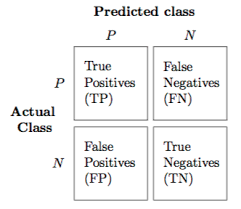

In [0]:
confusion_matrix_2 = confusion_matrix(y_o_test, y_pred_ad_o)
print(confusion_matrix_2)

[[1205  138]
 [  14  143]]


# KNN 



In [0]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}

use gridsearch to test all values for n_neighbors

In [0]:
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

  1 2 3 4 5 67 8 9 0

In [0]:
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 7}

In [0]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9396512161541992

In [0]:
knn_gscv_o = GridSearchCV(knn, param_grid, cv=5)
knn_gscv_o.fit(X_o, Y_o)
print(knn_gscv_o.best_params_)
print(knn_gscv_o.best_score_)

{'n_neighbors': 4}
0.904


In [0]:
knn_gscv_z = GridSearchCV(knn, param_grid, cv=5)
knn_gscv_z.fit(X[new_columns], Y)
print(knn_gscv_z.best_params_)
print(knn_gscv_z.best_score_)

{'n_neighbors': 9}
0.9469940339605324


In [0]:
knn_gscv_m = GridSearchCV(knn, param_grid, cv=5)
knn_gscv_m.fit(X[col_without_mort], Y)
print(knn_gscv_m.best_params_)
print(knn_gscv_m.best_score_)

{'n_neighbors': 1}
0.9497475906379073


In [0]:
knn_gscv_st = GridSearchCV(knn, param_grid, cv=5)
knn_gscv_st.fit(st_X[new_columns],st_y)
print(knn_gscv_st.best_params_)
print(knn_gscv_st.best_score_)

{'n_neighbors': 1}
0.9463910301331465


In [0]:
knn_gscv_ad = GridSearchCV(knn, param_grid, cv=5)
knn_gscv_ad.fit(ad_X[new_columns],ad_y)
print(knn_gscv_ad.best_params_)
print(knn_gscv_ad.best_score_)

{'n_neighbors': 1}
0.936622191011236


In [0]:
knn_a = KNeighborsClassifier(n_neighbors = 9)

In [0]:
knn.fit(X_train[new_columns],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test[new_columns])

In [0]:
confusion_matrix_2 = confusion_matrix(y_test, pred)
print(confusion_matrix_2)

[[1214   24]
 [  50   20]]


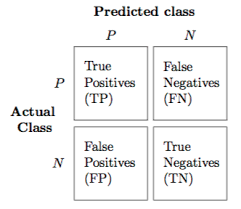

# Naïve Bayes

In [0]:
model_sim = GaussianNB()
model_sim.fit(X_train,y_train)
y_pred_sim = model_sim.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sim))

Accuracy: 0.9258409785932722


In [0]:
model_sim_o = GaussianNB()
model_sim_o.fit(X_o_train,y_o_train)
y_pred_o = model_sim_o.predict(X_o_test)
print("Accuracy:",metrics.accuracy_score(y_o_test, y_pred_o))

Accuracy: 0.8966666666666666


In [0]:
model_pin = GaussianNB()
model_pin.fit(X_train[new_columns],y_train)
y_pred_pin = model_pin.predict(X_test[new_columns])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_pin))

Accuracy: 0.9235474006116208


In [0]:
model_st = GaussianNB()
model_st.fit(st_X[new_columns],st_y)
y_pred_st = model_st.predict(X_test[new_columns])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_st))

Accuracy: 0.9067278287461774


In [0]:
model_ad = GaussianNB()
model_ad.fit(ad_X[new_columns],ad_y)
y_pred_ad = model_ad.predict(X_test[new_columns])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ad))

Accuracy: 0.9051987767584098


In [0]:
confusion_matrix_nb = confusion_matrix(y_test, y_pred_sim)
print(confusion_matrix_nb)

[[1170   68]
 [  29   41]]


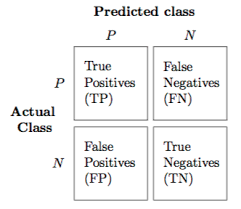

In [0]:
confusion_matrix_nb_2 = confusion_matrix(y_test, y_pred_pin)
print(confusion_matrix_nb_2)

[[1167   71]
 [  29   41]]
